![Shark attacks, a project by Roberto Henríquez Perozo. Data Analytics Bootcamp at IronHack](shark-attacks.png)

<center>You can clone the repo of this project at <br>https://github.com/rihp/shark-attacks </center>

 <center><h1> PART II <br> Data analysis and hypothesis formulation</h1> </center>
 
 

In [1]:
# You should have an exported.csv file. 
# We generated it while following along the 'PART I' of this project. 
# Do you have it?
!ls
# If you don't, you can download the 'PART I' from: https://github.com/rihp/shark-attacks

analysis.ipynb	clean.ipynb   README.md
attacks.csv	exported.csv  shark-attacks.png


In [3]:
# Importing modules
import pandas as pd
import random
import matplotlib

%matplotlib inline

In [4]:
# Loading the cleaned dataset as a dataframe
df = pd.read_csv('exported.csv')
df

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2,Provoked
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling,"No injury to occupant, outrigger canoe and pad..."
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,Minor injury to left thigh,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing,Minor injury to left thigh
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,Injury to left lower leg from surfboard skeg,N,Invalid,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing,Injury to left lower leg from surfboard skeg
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,Minor injury to lower leg,N,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,OTHER / NOT KNOWN,Surfing,Minor injury to lower leg
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving,PROVOKED
5,5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,M,"No injury, board bitten",N,Invalid,"Daily Telegraph, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Surfing,"No injury, board bitten"
6,6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,FATAL,Y,Tiger shark,"Diario de Pernambuco, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Swimming,FATAL
7,7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,Minor injury to foot. PROVOKED INCIDENT,N,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Lemon shark,Fishing,PROVOKED
8,8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,Lower left leg bitten,N,"Bull shark, 6'","K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Walking,Lower left leg bitten
9,9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,M,Minor injury to foot,N,Invalid,"K. McMurray, Tracking Sharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,INVALID ENTRY,Standing,Minor injury to foot


In [5]:
# Review the columns of the exported dataset
df.columns

Index([u'Unnamed: 0', u'CaseNum', u'Date', u'Year', u'Type', u'Country',
       u'Area', u'Location', u'Activity', u'Sex', u'Injury', u'Fatal',
       u'Species', u'Source', u'href', u'Species2', u'Activity2', u'Provoked'],
      dtype='object')

# 🎣️  BASIC GRAPHS

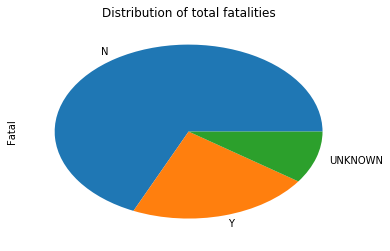

In [7]:
# Total Fatalities
s_fatal = df.Fatal.value_counts()
s_fatal.plot.pie(title='Distribution of total fatalities')

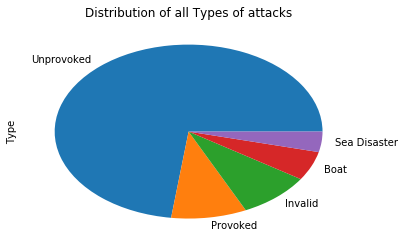

In [9]:
# Types of attack
s_types = df.Type.value_counts()
s_types.plot.pie(title='Distribution of all Types of attacks')

In [11]:
# This plot is a mess, don't graph it
df.Location[df.Location.value_counts() > 20].value_counts().plot.pie()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [7]:
# IDEA: make bins to filter the years when it happened

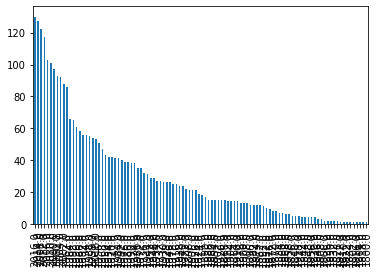

In [43]:
Years2p = list(range(1800,2020,2))
df.Year[df.Year.isin(Years2p)].value_counts().plot.bar()

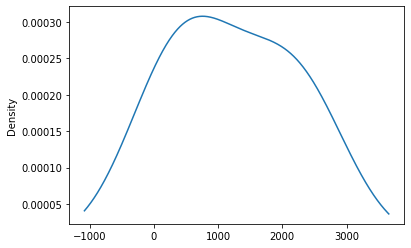

In [9]:
df["Decade"] = pd.cut(df.Year,
                            bins=[1800,1850,1900,1950,2000,2050])
                            #, 
#                            labels=range(1800,2020,10))
df.Decade.value_counts().plot.density()

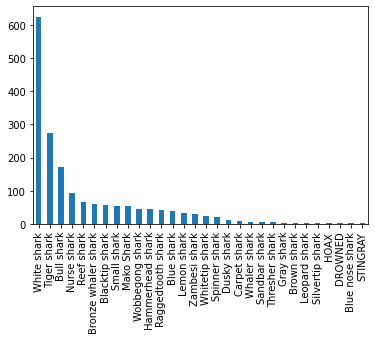

In [37]:
df.Species2[~df.Species2.isin(['INVALID ENTRY',
                               'OTHER / NOT KNOWN'])
           ].value_counts().plot.bar()

In [11]:
df[~df['Fatal'].isin(['UNKNOWN'])][['Species2', 'Fatal']]

,Species2,Fatal
0,White shark,N
1,INVALID ENTRY,N
2,INVALID ENTRY,N
3,OTHER / NOT KNOWN,N
4,Tiger shark,N
...,...,...
6297,INVALID ENTRY,Y
6298,INVALID ENTRY,Y
6299,INVALID ENTRY,Y
6300,INVALID ENTRY,Y


# I want to make a new column that specifies, the species and if it was deadly or not
Firts, I'll take any values which don't contribute to our research, and focus only on the deadliest species

In [12]:
fatals_filetred = ~df.Fatal.isin(['UNKNOWN'])

In [13]:
df.Species2.value_counts()

INVALID ENTRY          3052
OTHER / NOT KNOWN      1467
White shark             625
Tiger shark             275
Bull shark              171
Nurse shark              94
Reef shark               65
Bronze whaler shark      60
Blacktip shark           56
Small shark              55
Mako Shark               53
Wobbegong shark          46
Hammerhead shark         44
Raggedtooth shark        43
Blue shark               38
Lemon shark              34
Zambesi shark            29
Whitetip shark           23
Spinner shark            20
Dusky shark              12
Carpet shark              8
Whaler shark              6
Sandbar shark             5
Thresher shark            4
Gray shark                3
Brown shark               3
HOAX                      2
Leopard shark             2
DROWNED                   2
Silvertip shark           2
Blue nose shark           2
STINGRAY                  1
Name: Species2, dtype: int64

In [14]:
# Define the sharks I want to consider
killer_sharks =['White shark',
                'Tiger shark',
                'Bull shark',
                'Nurse shark', 
                'Reef shark',
                'Bronze whaler shark']

# How many samples of each species are there?
print(df.Species2[df.Species2.isin(killer_sharks)].value_counts())

# Create a dataframe containing only the indexes with those species
species_fatality = df[df.Species2.isin(killer_sharks)]
#df.Species2.value_counts()

White shark            625
Tiger shark            275
Bull shark             171
Nurse shark             94
Reef shark              65
Bronze whaler shark     60
Name: Species2, dtype: int64


In [15]:
species_fatality = df[df.Species2.isin(killer_sharks)]

In [16]:
species_fatality = species_fatality#.reset_index()
species_fatality[['Fatal', 'Species2']]
species_fatality[fatals_filetred]#.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2,Provoked,Decade
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling,"No injury to occupant, outrigger canoe and pad...","(2000.0, 2050.0]"
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving,PROVOKED,"(2000.0, 2050.0]"
6,6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,FATAL,Y,Tiger shark,"Diario de Pernambuco, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Swimming,FATAL,"(2000.0, 2050.0]"
8,8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,Lower left leg bitten,N,"Bull shark, 6'","K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Walking,Lower left leg bitten,"(2000.0, 2050.0]"
10,10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,Minor bite to hand by captive shark. PROVOKED ...,N,Grey reef shark,"ABC.net.au ,05/24/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Reef shark,Feeding sharks,PROVOKED,"(2000.0, 2050.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6250,ND.0055,Before 1958,0.0,Provoked,BAHAMAS,Andros Islands,Middle Bight,Testing movie camera in full diving dress,M,Shark bit diver's sleeve after he patted it on...,N,"Nurse shark, 2.1 m [7']","V.M. Coppleson (1958), p.97",http://sharkattackfile.net/spreadsheets/pdf_di...,Nurse shark,Diving,PROVOKED,NaN
6253,6253,ND.0052,Before 1957,0.0,Unprovoked,NICARAGUA,Lake Nicaragua (fresh water),A village north of San Carlos,Lashing logs together when he fell into the water,M,"FATAL, leg severed",Y,"Bull shark caught, leg recovered & buried besi...","F. Poli, pp.150-153",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Fell to the water,"FATAL, leg severed",NaN
6265,6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,M,"FATAL, left leg bitten with severe blood loss",Y,Bull shark,B.W. Coad & L.A.J. Al-Hassan,http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Swimming,"FATAL, left leg bitten with severe blood loss",NaN
6274,6274,ND.0028,A few years before 1938,0.0,Boat,ITALY,Adriatic Sea,NaN,Wooden fishing boat,M,No injury to occupant; shark capsized boat,N,White shark,A. De Maddalena; Anon. (1938),http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Fishing,No injury to occupant; shark capsized boat,NaN


In [17]:
dfx = species_fatality[fatals_filetred]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [18]:
dfx

,Unnamed: 0,CaseNum,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal,Species,Source,href,Species2,Activity2,Provoked,Decade
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Paddling,"No injury to occupant, outrigger canoe and pad...","(2000.0, 2050.0]"
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Diving,PROVOKED,"(2000.0, 2050.0]"
6,6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,FATAL,Y,Tiger shark,"Diario de Pernambuco, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Tiger shark,Swimming,FATAL,"(2000.0, 2050.0]"
8,8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,Lower left leg bitten,N,"Bull shark, 6'","K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Walking,Lower left leg bitten,"(2000.0, 2050.0]"
10,10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,Minor bite to hand by captive shark. PROVOKED ...,N,Grey reef shark,"ABC.net.au ,05/24/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,Reef shark,Feeding sharks,PROVOKED,"(2000.0, 2050.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6250,ND.0055,Before 1958,0.0,Provoked,BAHAMAS,Andros Islands,Middle Bight,Testing movie camera in full diving dress,M,Shark bit diver's sleeve after he patted it on...,N,"Nurse shark, 2.1 m [7']","V.M. Coppleson (1958), p.97",http://sharkattackfile.net/spreadsheets/pdf_di...,Nurse shark,Diving,PROVOKED,NaN
6253,6253,ND.0052,Before 1957,0.0,Unprovoked,NICARAGUA,Lake Nicaragua (fresh water),A village north of San Carlos,Lashing logs together when he fell into the water,M,"FATAL, leg severed",Y,"Bull shark caught, leg recovered & buried besi...","F. Poli, pp.150-153",http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Fell to the water,"FATAL, leg severed",NaN
6265,6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,M,"FATAL, left leg bitten with severe blood loss",Y,Bull shark,B.W. Coad & L.A.J. Al-Hassan,http://sharkattackfile.net/spreadsheets/pdf_di...,Bull shark,Swimming,"FATAL, left leg bitten with severe blood loss",NaN
6274,6274,ND.0028,A few years before 1938,0.0,Boat,ITALY,Adriatic Sea,NaN,Wooden fishing boat,M,No injury to occupant; shark capsized boat,N,White shark,A. De Maddalena; Anon. (1938),http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,Fishing,No injury to occupant; shark capsized boat,NaN


In [19]:
print(dfx.Fatal.value_counts())
print()
print(dfx.Species2.value_counts())

N    1020
Y     251
Name: Fatal, dtype: int64

White shark            614
Tiger shark            271
Bull shark             170
Nurse shark             93
Reef shark              64
Bronze whaler shark     59
Name: Species2, dtype: int64


# 🦈️At this point, the data is clean enough to create the plot
## Grouping by Species, and then Fatality

In [20]:
import numpy as np

In [21]:
dfx['Victim_died'] = np.where(dfx.Fatal.isin(['Y']), True, False)
dfx['Victim_survived'] = np.where(dfx.Fatal.isin(['N']), True, False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
toplot =dfx.groupby(['Species2','Fatal']).agg({'Victim_survived':'sum', 'Victim_died':'sum'})

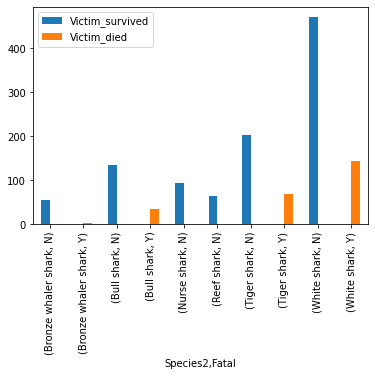

In [23]:
toplot.plot.bar()

In [24]:
toplot

Victim_survived  Victim_died
Species2            Fatal                              
Bronze whaler shark N                 55.0          0.0
                    Y                  0.0          4.0
Bull shark          N                135.0          0.0
                    Y                  0.0         35.0
Nurse shark         N                 93.0          0.0
Reef shark          N                 64.0          0.0
Tiger shark         N                202.0          0.0
                    Y                  0.0         69.0
White shark         N                471.0          0.0
                    Y                  0.0        143.0

In [25]:
toplot.T.columns

MultiIndex([('Bronze whaler shark', 'N'),
            ('Bronze whaler shark', 'Y'),
            (         'Bull shark', 'N'),
            (         'Bull shark', 'Y'),
            (        'Nurse shark', 'N'),
            (         'Reef shark', 'N'),
            (        'Tiger shark', 'N'),
            (        'Tiger shark', 'Y'),
            (        'White shark', 'N'),
            (        'White shark', 'Y')],
           names=['Species2', 'Fatal'])

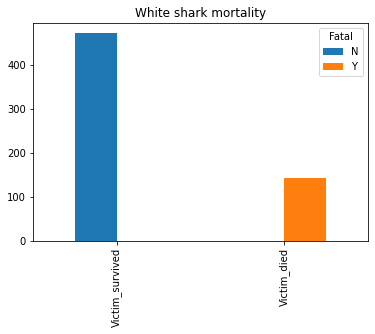

In [26]:
examine = 'White shark'
display(toplot.T[f'{examine}'].plot.bar(title=f'{examine} mortality'))

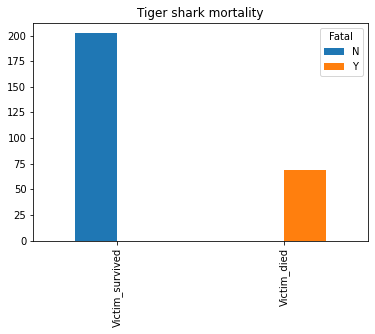

In [27]:
examine = 'Tiger shark'
display(toplot.T[f'{examine}'].plot.bar(title=f'{examine} mortality'))

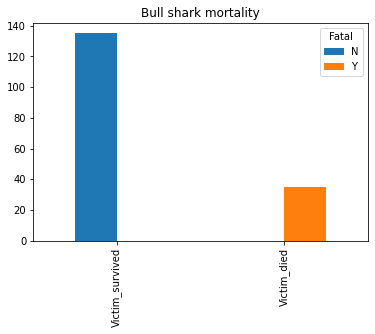

In [28]:
examine = 'Bull shark'
toplot.T[f'{examine}'].plot.bar(title=f'{examine} mortality')

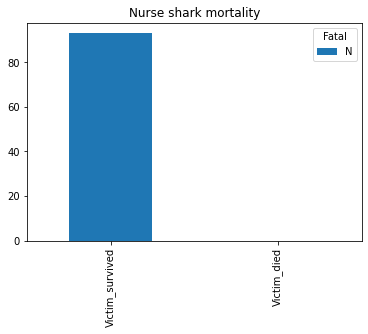

In [29]:
examine = 'Nurse shark'
toplot.T[f'{examine}'].plot.bar(title=f'{examine} mortality')

In [30]:
dfx[['Species2','Fatal2']].groupby('Species2').agg({'Fatal':"count"})

KeyError: "['Fatal2'] not in index"

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
def filt(x):
    if x =='UNKNOWN':
        return None
    else:
        return x
df.reset_index()
Fatal_na = df.Fatal.isin(['UNKNOWN'])
Species_na = df.Species2.isin(['INVALID ENTRY', 'OTHER / NOT KNOWN'])
sx = df.loc[~Fatal_na].groupby(["Fatal", "Species2"]).agg({"Type":"count"})
sy = df.loc[~Species_na]
# avoid.value_counts()
#Species_na.value_counts()
#df[~Fatal_na, ~Species_na]
sp_na = df[~Species_na]
df_nonull = sp_na[~Fatal_na]

In [ ]:
df_ok = df_nonull.reset_index()
# df_ok.head().plot.scatter(df_ok.Species2,df_ok.Fatal)

In [ ]:
matplotlib.pyplot.scatter(df_nonull.Fatal, df_nonull.Species2)


In [ ]:
dfx = df[['Species2','Fatal']]
dfx.isnull().sum()

In [ ]:
avoid1 = ~df['Fatal'].isin(['UNKNOWN'])
avoid2 = ~df['Species2'].isin(['OTHER / NOT KNOWN', 'INVALID ENTRY'])
df2p = df[avoid1][avoid2][['Species2', 'Fatal']]
#df2p.plot.bar('Fatal', 'Species2')

In [ ]:
df2p.Fatal.values

In [ ]:
df2p.Species2.values

In [ ]:
Yes = (lambda x: True if x == 'Y' else False)
df2p.groupby('Species2').agg({"Fatal" : Yes})

In [ ]:
df.columns